# Problem 1 

Use this notebook to write your code for problem 1. Some example code, and a plotting function for drawing decision boundaries, are given below.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
%matplotlib inline

### Load the data:

In [6]:
data = np.loadtxt('data/problem1data1.txt')
X = data[:, :2]
y = data[:, 2]

### The function make_plot below is a helper function for plotting decision boundaries; you should not need to change it.

In [3]:
def make_plot(X, y, clf, title, filename):
    '''
    Plots the decision boundary of the classifier <clf> (assumed to have been fitted
    to X via clf.fit()) against the matrix of examples X with corresponding labels y.

    Uses <title> as the title of the plot, saving the plot to <filename>.

    Note that X is expected to be a 2D numpy array of shape (num_samples, num_dims).
    '''
    # Create a mesh of points at which to evaluate our classifier
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # binarize 
    Z = np.where(Z > 0, np.ones(len(Z)), -1 * np.ones(len(Z)))
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, vmin=-1, vmax=1)

    # Also plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.savefig(filename)
    plt.show()

## Here is some example code for performing regression with scikit-learn.
This section is not part of the problem! It demonstrates usage of the Ridge regression function, in particular illustrating what happens when the regularization strength is set to an overly-large number.

Ridge regression fit y = 1.451939x + 10.804800


Text(0.5, 1.0, 'Ridge Regression with High Regularization')

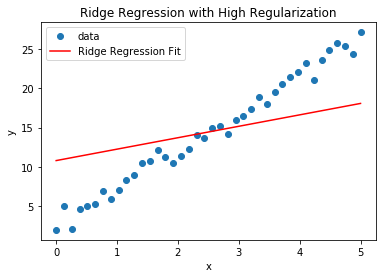

In [4]:
# Instantiate a Ridge regression object:
ridge = Ridge(alpha = 200)

# Generate some fake data: y is linearly dependent on x, plus some noise.
n_pts = 40

x = np.linspace(0, 5, n_pts)
y = 5 * x + np.random.randn(n_pts) + 2

x = np.reshape(x, (-1, 1))   # Ridge regression function expects a 2D matrix

plt.figure()
plt.plot(x, y, marker = 'o', linewidth = 0)

ridge.fit(x, y)   # Fit the ridge regression model to the data
print('Ridge regression fit y = %fx + %f' % (ridge.coef_, ridge.intercept_))

# Add ridge regression line to the plot:
plt.plot(x, ridge.coef_ * x + ridge.intercept_, color = 'red')
plt.legend(['data', 'Ridge Regression Fit'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression with High Regularization')

# Your code for problem 1

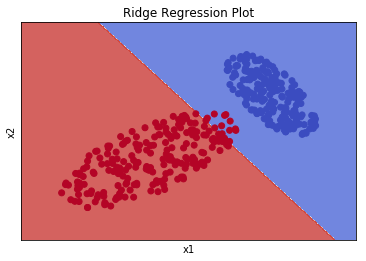

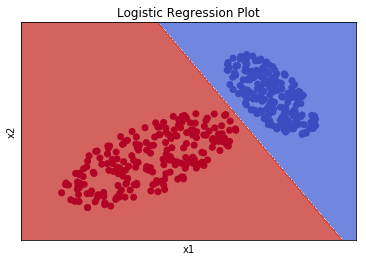

In [7]:
# set and fit the ridge and logistic regression
ridge = Ridge(alpha = 1)
ridge.fit(X, y)
lr = LogisticRegression(solver='liblinear', C=1000).fit(X, y)

# plot the fits with the make_plot funciton above
make_plot(X, y, ridge, "Ridge Regression Plot", "test.jpg")
make_plot(X, y, lr, "Logistic Regression Plot", "test.jpg")